In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch
from sklearn.preprocessing import maxabs_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
2024-11-11 16:55:59.763079: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical resul

In [2]:
X, y = make_blobs(n_samples=800, centers=4, n_features=10, random_state=42)
X = maxabs_scale(X)
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = np.array(X)
# y = np.array(y)
# X = X.astype('float32') / 255.
# y = y.astype('int')
# X, _, y, _ = train_test_split(X, y, train_size=3000, test_size=2000, random_state=420)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

device:  cuda:0
Epoch 1/150, Loss: 0.48335486
Epoch 2/150, Loss: 0.28559135
Epoch 3/150, Loss: 0.28034915
Epoch 4/150, Loss: 0.27851638
Epoch 5/150, Loss: 0.27783841
Epoch 6/150, Loss: 0.27721680
Epoch 7/150, Loss: 0.27677467
Epoch 8/150, Loss: 0.27642642
Epoch 9/150, Loss: 0.27623907
Epoch 10/150, Loss: 0.27607885
Epoch 11/150, Loss: 0.27587797
Epoch 12/150, Loss: 0.27570534
Epoch 13/150, Loss: 0.27556060
Epoch 14/150, Loss: 0.27545809
Epoch 15/150, Loss: 0.27536802
Epoch 16/150, Loss: 0.27529254
Epoch 17/150, Loss: 0.27522606
Epoch 18/150, Loss: 0.27515416
Epoch 19/150, Loss: 0.27509524
Epoch 20/150, Loss: 0.27503560
Epoch 21/150, Loss: 0.27498929
Epoch 22/150, Loss: 0.27495445
Epoch 23/150, Loss: 0.27492386
Epoch 24/150, Loss: 0.27489953
Epoch 25/150, Loss: 0.27487835
Epoch 26/150, Loss: 0.27486240
Epoch 27/150, Loss: 0.27485136
Epoch 28/150, Loss: 0.27484357
Epoch 29/150, Loss: 0.27482705
Epoch 30/150, Loss: 0.27480143
Epoch 31/150, Loss: 0.27477828
Epoch 32/150, Loss: 0.27476458
E

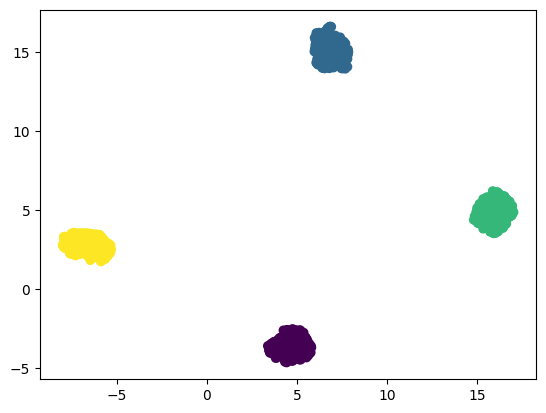

In [3]:
P = UMAP(n_components=2)

# X2D = TSNE(n_components=2).fit_transform(X)
X2D = P.fit_transform(X)
plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# Pinv = NNinv_torch()
# Pinv = RBFinv()
# Pinv = Pinv_ilamp()
Pinv.fit(X2D, X)



In [4]:
builder = MapBuilder(Pinv, None, X2d=X2D, X=X, y=y, scaling=0.9, P=P)

n_classes: 4
150


Loss: 0.8105: 100%|██████████| 150/150 [00:00<00:00, 167.05it/s]


In [ ]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=200)
    ax[i].set_title(content)

relace the label with the gradient
relace the label with the dist_map


len(q) = 0:   2%|▏         | 1/50 [00:00<00:00, 338.44it/s]


UnboundLocalError: cannot access local variable 'sparse' where it is not associated with a value

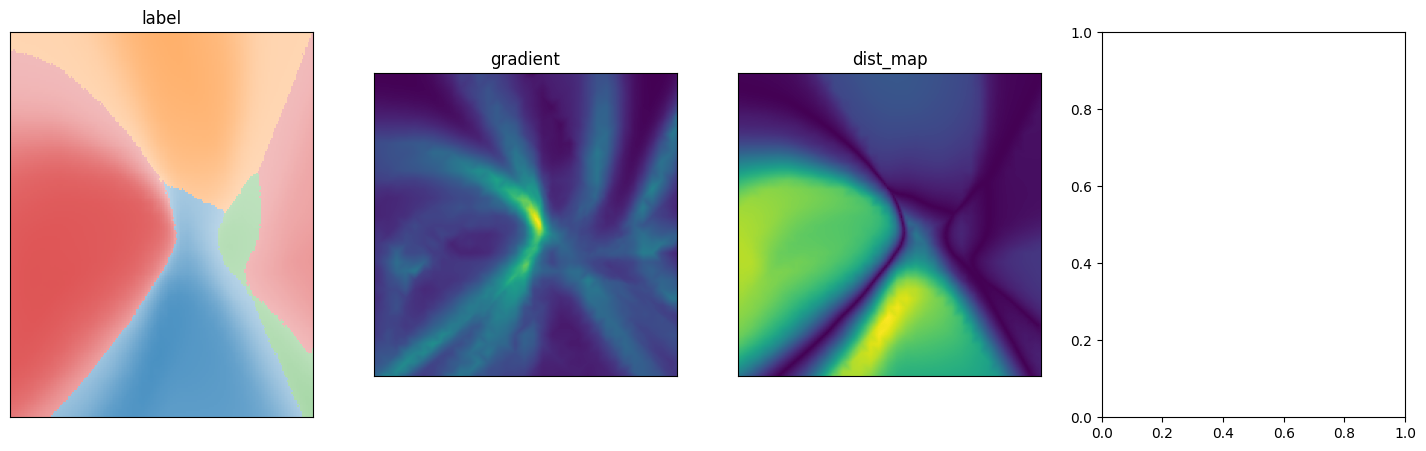

In [9]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=200)
    ax[i].set_title(content)

relace the label with the gradient


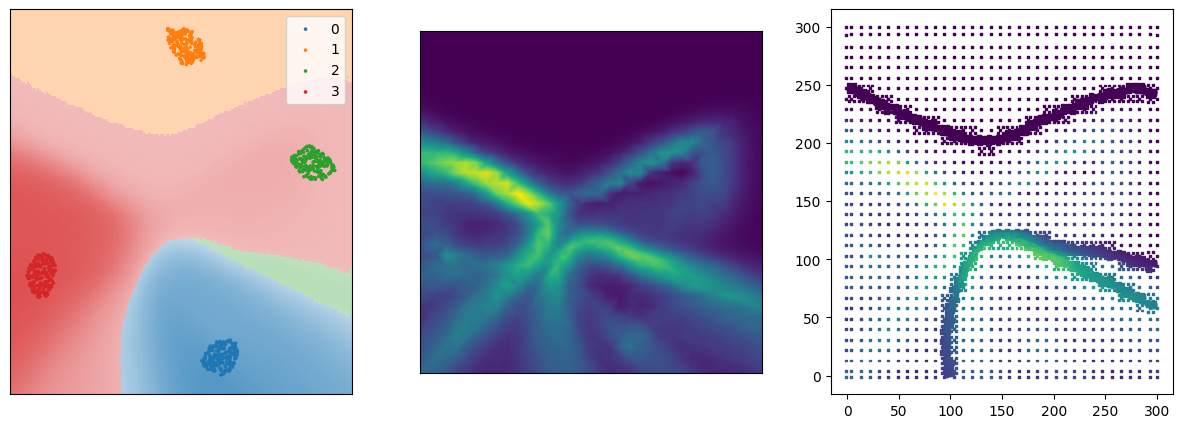

In [ ]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=300)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='viridis', marker='s', s=2)
